# Data analysis

## Setup

In [1]:
# Load packages
library(readxl)
library(dplyr)
library(ggplot2)
library(stats)
library(stargazer)
library(purrr)
library(stringr)
library(tidyverse)
library(lubridate)
library(lessR)
library(fixest)
library(sandwich)
library(lmtest)
library(car)
library(effsize)


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'dplyr'"

Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'stargazer'"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'purrr'"
Warning message in sprintf(gettext(fmt, domain = domain), ..

In [2]:
# Import the data
# Set the base directory path
base_directory <- "/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_management/" #nolint 

# Create a list of file names
file_names <- c(
    "editorial_playlists_23-24_final.csv",
    "editorial_playlists_22-23_final.csv",
    "editorial_playlists_21-22_final.csv",
    "major_playlists_23-24_final.csv"
)

# Modify the data frame
df_list <- list()

for (i in seq_along(file_names)) {
    file_name <- file_names[i]

    full_path <- file.path(base_directory, file_name)
    df <- read_csv(full_path)

    # Append the data frame to the list
    df_list[[i]] <- df
}

# Combine all data frames
df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)

# Export to Excel
write.csv(df, "df_final.csv")


Rows: 3171 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (5): playlist_id, playlist_name, playlist_type, stirling_index, stirlin...
dbl  (8): nb_tracks, nb_clusters, nb_clusters_2, hh_index, hh_index_2, dista...
dttm (2): collection_date, mean_track_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3172 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (5): playlist_id, playlist_name, playlist_type, stirling_index, stirlin...
dbl  (8): nb_tracks, nb_clusters, nb_clusters_2, hh_index, hh_index_2, dista...
dttm (2): collection_date, mean_track_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3233 Columns: 15
-- Column specification

## Data management

In [3]:
# Load data
df <- read.csv("df_final.csv")


### Main measure

In [4]:
# Extract numeric values
df$diversity_clean <- as.numeric(gsub("[^[:digit:].-]", "", df$stirling_index))
df$diversity_clean

df$diversity_clean_2 <- as.numeric(
    gsub("[^[:digit:].-]", "", df$stirling_index_2)
)
df$diversity_clean_2

# Scale values from 0 to 1
df$diversity_norm <- rescale(diversity_clean, df, kind = "z")
df$diversity_norm

df$diversity_norm_2 <- rescale(diversity_clean_2, df, kind = "z")
df$diversity_norm_2


[1] 0.12060846 0.12319351 0.12538606 0.14139733 0.10045163 0.09865746
    [7] 0.16846591 0.11533955 0.16600071 0.17000502 0.16739803 0.09767080
   [13] 0.10356547 0.10356547 0.09840500 0.09657663 0.10366772 0.11210481
   [19] 0.10681009 0.10606648 0.15268424 0.10404657 0.16090380 0.15829443
   [25] 0.20851001 0.15830316 0.18588735 0.10449157 0.10691505 0.09863520
   [31] 0.15680161 0.09988447 0.15284861 0.10044521 0.09938378 0.09954848
   [37] 0.21229732 0.12429388 0.17965186 0.21065479 0.12007142 0.17779838
   [43] 0.12299726 0.21121075 0.12084154 0.12084154 0.12084154 0.18148315
   [49] 0.12313757 0.10800478 0.16322802 0.11432391 0.19032114 0.19032114
   [55] 0.19032114 0.19032114 0.22594329 0.22594329 0.13239957 0.13239957
   [61] 0.22152203 0.22152203 0.22152203 0.22152203 0.13374311 0.22152203
   [67] 0.22152203 0.19668445 0.19668445 0.19668445 0.13377759 0.19668445
   [73] 0.13377759 0.19668445 0.13377759 0.19668445 0.19668445 0.13377759
   [79] 0.19668445 0.13348547 0.13348547 0.13348547 0.19657123 0.13441444
   [85] 0.19657123 0.19657123 0.19657123 0.19657123 0.13508509 0.19505635
   [91] 0.19505635 0.19505635 0.13405129 0.19505635 0.19505635 0.19505635
   [97] 0.19505635 0.19505635 0.19505635 0.19505635 0.19505635 0.19505635
  [103] 0.19471437 0.19471437 0.16475557 0.16357507 0.16357507 0.10847517
  [109] 0.10808927 0.10603035 0.11076081 0.11498994 0.11771622 0.16207413
  [115] 0.11742225 0.12029699 0.11802747 0.11802747 0.16480593 0.11395034
  [121] 0.11596833 0.16843960 0.16737501 0.11055745 0.10605859 0.10153795
  [127] 0.10153795 0.08904385 0.08492683 0.15297222 0.15184434 0.10121236
  [133] 0.10121236 0.18463206 0.17042147 0.11630220 0.17236235 0.17122719
  [139] 0.16928935 0.11342393 0.11261452 0.11768223 0.11908201 0.11824572
  [145] 0.11661466 0.11795915 0.16403718 0.16299999 0.16368330 0.16368330
  [151] 0.16368330 0.16368330 0.16488921 0.16424421 0.16658977 0.16720007
  [157] 0.19670832 0.11772523 0.19670832 0.19670832 0.19670832 0.19670832
  [163] 0.19670832 0.11772523 0.19670832 0.11772523 0.19670832 0.11772523
  [169] 0.11772523 0.19670832 0.21633130 0.19670832 0.19670832 0.19670832
  [175] 0.19670832 0.19670832 0.21633130 0.19670832 0.11772523 0.19670832
  [181] 0.11772523 0.19670832 0.11772523 0.19670832 0.19670832 0.19670832
  [187] 0.19670832 0.19670832 0.21633130 0.11772523 0.19670832 0.19670832
  [193] 0.19670832 0.19670832 0.19670832 0.21633130 0.21633130 0.19670832
  [199] 0.19670832 0.19670832 0.19670832 0.21633130 0.11772523 0.19670832
  [205] 0.11772523 0.19670832 0.21633130 0.19670832 0.23325286 0.23325286
  [211] 0.18903153 0.18903153 0.23709748 0.23561526 0.23550547 0.23550547
  [217] 0.31076031 0.24072551 0.24072551 0.24072551 0.31076031 0.28253533
  [223] 0.28615853 0.24466840 0.24180152 0.19100094 0.19100094 0.19100094
  [229] 0.19100094 0.19480121 0.19509743 0.25682680 0.25682680 0.25682680
  [235] 0.19424716 0.19424716 0.19424716 0.33336349 0.29570737 0.19408073
  [241] 0.31847286 0.33336349 0.19408073 0.29570737 0.19408073 0.29391761
  [247] 0.25468693 0.19382488 0.25494202 0.19382488 0.25494202 0.19382488
  [253] 0.19382488 0.19382488 0.19382488 0.19382488 0.19382488 0.25494202
  [259] 0.19382488 0.25824271 0.11703378 0.24601943 0.12213915 0.22022181
  [265] 0.22629738 0.22331834 0.11981363 0.11723540 0.22470829 0.22588168
  [271] 0.22588168 0.22588168 0.22588168 0.22588168 0.12098650 0.12855261
  [277] 0.12803139 0.22033441 0.13051090 0.12275947 0.12836731 0.12707805
  [283] 0.12824386 0.12589370 0.18883804 0.22140278 0.12195588 0.18874251
  [289] 0.18751915 0.12576869 0.12447060 0.12718194 0.12887407 0.17301987
  [295] 0.11390435 0.21684782 0.17002462 0.11831447 0.17637759 0.11855785
  [301] 0.11902426 0.21947253 0.11409898 0.12165539 0.17837764 0.12144024
  [307] 0.12144024 0.12223067 0.12465999 0.12365494 0.12051054 0.11925899
  [313] 0.21014529 0.21014529 0.12595515 0.17319379 0.17647200 0.20991090
  [319] 0.12078698 0.11889301 0.12146157 0.20526408 0.20419440 0.17831909
  [325] 

[1] 0.2527348 0.2248078 0.2716738 0.2485944 0.2375105 0.2271831 0.2720759
    [8] 0.2623435 0.2724035 0.2760086 0.2265043 0.2668785 0.2631720 0.2429628
   [15] 0.2729780 0.2569059 0.2421860 0.2707319 0.2327678 0.2421201 0.2473224
   [22] 0.2389810 0.2397038 0.2093891 0.2319295 0.2361216 0.1858874 0.2201586
   [29] 0.2346566 0.2217586 0.2484608 0.2411625 0.1528486 0.2269486 0.2325902
   [36] 0.2118570 0.2728400 0.2566080 0.2664687 0.2664859 0.2712818 0.2770224
   [43] 0.2645367 0.2112108 0.2650212 0.2802927 0.2650212 0.2821874 0.2924466
   [50] 0.2405678 0.2817508 0.2801090 0.2812578 0.2812578 0.2812578 0.2812578
   [57] 0.2812578 0.2812578 0.2499350 0.2499350 0.2731811 0.2731811 0.2731811
   [64] 0.2731811 0.2731811 0.2731811 0.2731811 0.2893784 0.2893784 0.3133838
   [71] 0.2893784 0.3133838 0.2893784 0.3133838 0.2893784 0.2893784 0.2893784
   [78] 0.3133838 0.2893784 0.2196572 0.2753788 0.2898289 0.2819776 0.2819776
   [85] 0.2819776 0.2819776 0.2819776 0.2819776 0.2679785 0.3091280 0.2631561
   [92] 0.3091280 0.2631561 0.3091280 0.2631561 0.2631561 0.3091280 0.3091280
   [99] 0.2631561 0.3091280 0.2631561 0.2631561 0.3089744 0.3089744 0.2593760
  [106] 0.2465792 0.2465792 0.2431071 0.2451113 0.1060303 0.2371705 0.2653238
  [113] 0.2708490 0.2694106 0.2650209 0.2676200 0.2459764 0.2243671 0.2395321
  [120] 0.2505521 0.2415992 0.2016001 0.2609641 0.2321598 0.2530385 0.2494168
  [127] 0.2617116 0.2536728 0.2580196 0.2389079 0.2506179 0.2117592 0.2290527
  [134] 0.2114699 0.2652927 0.2263985 0.2720357 0.2271998 0.2758723 0.2643188
  [141] 0.2695803 0.2720367 0.2749899 0.2782034 0.2660102 0.2274175 0.2267775
  [148] 0.2759236 0.2756584 0.2756584 0.2756584 0.2756584 0.2660532 0.2589597
  [155] 0.2235624 0.2773106 0.2555356 0.2555356 0.2555356 0.2555356 0.2555356
  [162] 0.2485537 0.2485537 0.2485537 0.2555356 0.2485537 0.2555356 0.2555356
  [169] 0.2555356 0.2555356 0.2555356 0.2555356 0.2555356 0.2485537 0.2555356
  [176] 0.2555356 0.2555356 0.2485537 0.2555356 0.2555356 0.2417511 0.2555356
  [183] 0.2485537 0.2555356 0.2485537 0.2485537 0.2555356 0.2485537 0.2555356
  [190] 0.2485537 0.2485537 0.2555356 0.2555356 0.2485537 0.2555356 0.2485537
  [197] 0.2555356 0.2485537 0.2555356 0.2555356 0.2485537 0.2555356 0.2555356
  [204] 0.2555356 0.2555356 0.2555356 0.2555356 0.2485537 0.3057476 0.3474744
  [211] 0.3582114 0.3582114 0.3595600 0.3408793 0.3416509 0.3416509 0.3512590
  [218] 0.3512590 0.2407255 0.3265478 0.3512590 0.3512590 0.3625513 0.3546627
  [225] 0.3264033 0.3347603 0.3347603 0.3347603 0.3347603 0.3470977 0.3651166
  [232] 0.3441145 0.3441145 0.3357320 0.3441145 0.3441145 0.3357320 0.3614107
  [239] 0.3512225 0.3614107 0.3614107 0.3614107 0.3614107 0.3512225 0.3614107
  [246] 0.3503945 0.3503945 0.3186012 0.3448411 0.3448411 0.3186012 0.3186012
  [253] 0.3186012 0.3186012 0.3186012 0.3186012 0.3186012 0.3448411 0.3448411
  [260] 0.3550603 0.2641895 0.2904406 0.2938285 0.2866388 0.2784401 0.2233183
  [267] 0.2797997 0.2741096 0.2848813 0.2866692 0.2866692 0.2866692 0.2866692
  [274] 0.2905319 0.2774374 0.2820564 0.2583701 0.2685750 0.2666944 0.2846813
  [281] 0.2781460 0.2414141 0.2874304 0.2812946 0.2771145 0.2774840 0.2196446
  [288] 0.2644548 0.2818188 0.2485209 0.2610467 0.1271819 0.2658046 0.2580744
  [295] 0.2304951 0.2424536 0.2491687 0.2707583 0.2671682 0.2580268 0.2702121
  [302] 0.2751958 0.2502259 0.2793294 0.2754674 0.2814135 0.2814135 0.2688599
  [309] 0.2631146 0.2746973 0.2724615 0.2731288 0.2884424 0.2789407 0.2310912
  [316] 0.2900243 0.2725895 0.2812429 0.2845853 0.2703940 0.2588163 0.2823557
  [323] 0.2434341 0.2477793 0.2791127 0.2791127 0.2756134 0.2756134 0.2675356
  [330] 0.2694544 0.2715697 0.2369729 0.2675075 0.2547797 0.2547797 0.2219619
  [337] 0.2667702 0.2667702 0.2630208 0.2579946 0.2579946 0.2590303 0.2321372
  [344] 0.2466614 0.2464183 0.2334944 0.2629297 0.2629297 0.2581078 0.2528461
  [351] 0.2337441 0.2585329 0.2603890 0.2535056 0.2580249 0.2580249 0.2584558
  [358] 0.2584558 0.258455

[1] -1.214 -1.164 -1.121 -0.810 -1.606 -1.641 -0.283 -1.316 -0.331 -0.253
   [11] -0.304 -1.660 -1.545 -1.545 -1.646 -1.681 -1.543 -1.379 -1.482 -1.497
   [21] -0.590 -1.536 -0.430 -0.481  0.496 -0.481  0.056 -1.527 -1.480 -1.641
   [31] -0.510 -1.617 -0.587 -1.606 -1.627 -1.623  0.569 -1.142 -0.066  0.537
   [41] -1.224 -0.102 -1.167  0.548 -1.209 -1.209 -1.209 -0.030 -1.165 -1.459
   [51] -0.385 -1.336  0.142  0.142  0.142  0.142  0.835  0.835 -0.985 -0.985
   [61]  0.749  0.749  0.749  0.749 -0.958  0.749  0.749  0.266  0.266  0.266
   [71] -0.958  0.266 -0.958  0.266 -0.958  0.266  0.266 -0.958  0.266 -0.963
   [81] -0.963 -0.963  0.263 -0.945  0.263  0.263  0.263  0.263 -0.932  0.234
   [91]  0.234  0.234 -0.952  0.234  0.234  0.234  0.234  0.234  0.234  0.234
  [101]  0.234  0.234  0.227  0.227 -0.355 -0.378 -0.378 -1.450 -1.457 -1.497
  [111] -1.405 -1.323 -1.270 -0.407 -1.276 -1.220 -1.264 -1.264 -0.354 -1.343
  [121] -1.304 -0.284 -0.304 -1.409 -1.497 -1.585 -1.585 -1.828 -1.908 -0.584
  [131] -0.606 -1.591 -1.591  0.031 -0.245 -1.298 -0.207 -0.229 -0.267 -1.354
  [141] -1.369 -1.271 -1.244 -1.260 -1.292 -1.265 -0.369 -0.389 -0.376 -0.376
  [151] -0.376 -0.376 -0.353 -0.365 -0.320 -0.308  0.266 -1.270  0.266  0.266
  [161]  0.266  0.266  0.266 -1.270  0.266 -1.270  0.266 -1.270 -1.270  0.266
  [171]  0.648  0.266  0.266  0.266  0.266  0.266  0.648  0.266 -1.270  0.266
  [181] -1.270  0.266 -1.270  0.266  0.266  0.266  0.266  0.266  0.648 -1.270
  [191]  0.266  0.266  0.266  0.266  0.266  0.648  0.648  0.266  0.266  0.266
  [201]  0.266  0.648 -1.270  0.266 -1.270  0.266  0.648  0.266  0.977  0.977
  [211]  0.117  0.117  1.052  1.023  1.021  1.021  2.484  1.122  1.122  1.122
  [221]  2.484  1.935  2.006  1.199  1.143  0.155  0.155  0.155  0.155  0.229
  [231]  0.235  1.435  1.435  1.435  0.218  0.218  0.218  2.924  2.191  0.215
  [241]  2.634  2.924  0.215  2.191  0.215  2.157  1.394  0.210  1.399  0.210
  [251]  1.399  0.210  0.210  0.210  0.210  0.210  0.210  1.399  0.210  1.463
  [261] -1.283  1.225 -1.184  0.723  0.842  0.784 -1.229 -1.279  0.811  0.833
  [271]  0.833  0.833  0.833  0.833 -1.207 -1.059 -1.070  0.726 -1.021 -1.172
  [281] -1.063 -1.088 -1.065 -1.111  0.113  0.746 -1.188  0.111  0.087 -1.114
  [291] -1.139 -1.086 -1.053 -0.195 -1.344  0.658 -0.253 -1.258 -0.129 -1.254
  [301] -1.245  0.709 -1.340 -1.194 -0.090 -1.198 -1.198 -1.182 -1.135 -1.155
  [311] -1.216 -1.240  0.527  0.527 -1.110 -0.191 -0.127  0.523 -1.210 -1.247
  [321] -1.197  0.432  0.412 -0.092  0.329  0.329 -0.141 -0.141 -0.153 -1.218
  [331] -0.366 -0.246 -0.260 -0.269 -0.269 -1.272 -0.222 -1.219 -1.250 -1.227
  [341] -1.227  0.747 -1.237 -1.198  0.328 -1.197  0.338  0.338  0.333 -0.172
  [351] -1.238 -1.259 -1.293 -1.303 -1.287 -1.287 -0.406 -0.406 -0.406 -0.406
  [361] -0.321  0.229 -0.307 -1.280  0.166 -1.204  0.508 -1.362 -1.105  0.491
  [371] -0.710 -0.710  0.964  0.964  0.964  0.996  0.996  0.996 -0.743  0.596
  [381]  0.596  1.011  1.011  0.596 -0.910  0.736  0.817  0.731  0.731 -0.291
  [391]  0.377  0.377  0.346 -0.336  0.777  0.900  0.455  0.760  0.760  1.621
  [401]  1.621 -0.333 -0.333  0.722  1.198  1.198  0.373  0.373  0.373  0.373
  [411]  0.373  0.373  0.538 -0.485 -0.496 -0.496 -1.419 -1.419 -1.419 -1.419
  [421] -1.419 -1.419 -1.419 -1.419 -1.419 -1.419 -1.419 -1.419 -1.419 -1.419
  [431] -1.419 -1.419 -1.419 -1.412 -1.412  0.253 -1.042  0.277  0.277 -1.350
  [441] -1.402 -1.402  0.618  0.603  0.109  0.109  0.109 -1.033 -1.049  0.162
  [451] -1.053 -1.053 -1.493 -1.493  0.898  0.307  0.307 -0.983  0.311  0.311
  [461] -0.984  0.985  0.985  0.985  0.985  1.538  1.538 -0.980  0.436  0.436
  [471]  0.826 -0.674  1.298 -0.717 -0.743  0.068  0.068 -0.834  0.046  0.008
  [481]  0.817  0.817 -0.060 -0.060 -0.064 -0.006  0.489  0.396 -0.116 -1.063
  [491] -1.063  0.510 -0.123 -0.123 -1.075 -0.159 -1.057  0.514 -0.172 -0.144
  [501] -0.146 -1.067 -0.162 -0.162 -0.175 -0.211 -1.085 -1.124 -0.229 -0.209
  [511] -0.209 -1.116 -0.2

[1] -1.237 -1.873 -0.806 -1.331 -1.584 -1.819 -0.797 -1.018 -0.789 -0.707
   [11] -1.834 -0.915 -1.000 -1.459 -0.776 -1.142 -1.477 -0.827 -1.692 -1.479
   [21] -1.360 -1.550 -1.534 -2.224 -1.711 -1.615 -2.758 -1.978 -1.649 -1.942
   [31] -1.334 -1.500 -3.510 -1.824 -1.696 -2.167 -0.779 -1.149 -0.924 -0.924
   [41] -0.815 -0.684 -0.968 -2.182 -0.957 -0.610 -0.957 -0.567 -0.333 -1.514
   [51] -0.577 -0.614 -0.588 -0.588 -0.588 -0.588 -0.588 -0.588 -1.301 -1.301
   [61] -0.772 -0.772 -0.772 -0.772 -0.772 -0.772 -0.772 -0.403 -0.403  0.143
   [71] -0.403  0.143 -0.403  0.143 -0.403 -0.403 -0.403  0.143 -0.403 -1.990
   [81] -0.722 -0.393 -0.572 -0.572 -0.572 -0.572 -0.572 -0.572 -0.890  0.046
   [91] -1.000  0.046 -1.000  0.046 -1.000 -1.000  0.046  0.046 -1.000  0.046
  [101] -1.000 -1.000  0.043  0.043 -1.086 -1.377 -1.377 -1.456 -1.411 -4.576
  [111] -1.591 -0.951 -0.825 -0.858 -0.957 -0.898 -1.391 -1.883 -1.538 -1.287
  [121] -1.491 -2.401 -1.050 -1.705 -1.230 -1.313 -1.033 -1.216 -1.117 -1.552
  [131] -1.285 -2.170 -1.776 -2.176 -0.951 -1.836 -0.798 -1.818 -0.710 -0.973
  [141] -0.854 -0.798 -0.731 -0.657 -0.935 -1.813 -1.828 -0.709 -0.715 -0.715
  [151] -0.715 -0.715 -0.934 -1.095 -1.901 -0.678 -1.173 -1.173 -1.173 -1.173
  [161] -1.173 -1.332 -1.332 -1.332 -1.173 -1.332 -1.173 -1.173 -1.173 -1.173
  [171] -1.173 -1.173 -1.173 -1.332 -1.173 -1.173 -1.173 -1.332 -1.173 -1.173
  [181] -1.487 -1.173 -1.332 -1.173 -1.332 -1.332 -1.173 -1.332 -1.173 -1.332
  [191] -1.332 -1.173 -1.173 -1.332 -1.173 -1.332 -1.173 -1.332 -1.173 -1.173
  [201] -1.332 -1.173 -1.173 -1.173 -1.173 -1.173 -1.173 -1.332 -0.031  0.919
  [211]  1.164  1.164  1.194  0.769  0.787  0.787  1.005  1.005 -1.510  0.443
  [221]  1.005  1.005  1.262  1.083  0.440  0.630  0.630  0.630  0.630  0.911
  [231]  1.321  0.843  0.843  0.652  0.843  0.843  0.652  1.236  1.004  1.236
  [241]  1.236  1.236  1.236  1.004  1.236  0.986  0.986  0.262  0.859  0.859
  [251]  0.262  0.262  0.262  0.262  0.262  0.262  0.262  0.859  0.859  1.092
  [261] -0.976 -0.379 -0.302 -0.465 -0.652 -1.907 -0.621 -0.751 -0.505 -0.465
  [271] -0.465 -0.465 -0.465 -0.377 -0.675 -0.570 -1.109 -0.877 -0.919 -0.510
  [281] -0.659 -1.495 -0.447 -0.587 -0.682 -0.674 -1.990 -0.970 -0.575 -1.333
  [291] -1.048 -4.095 -0.940 -1.116 -1.743 -1.471 -1.318 -0.827 -0.909 -1.117
  [301] -0.839 -0.726 -1.294 -0.632 -0.720 -0.584 -0.584 -0.870 -1.001 -0.737
  [311] -0.788 -0.773 -0.424 -0.641 -1.730 -0.388 -0.785 -0.588 -0.512 -0.835
  [321] -1.099 -0.563 -1.449 -1.350 -0.637 -0.637 -0.716 -0.716 -0.900 -0.857
  [331] -0.808 -1.596 -0.901 -1.191 -1.191 -1.937 -0.918 -0.918 -1.003 -1.117
  [341] -1.117 -1.094 -1.706 -1.375 -1.381 -1.675 -1.005 -1.005 -1.115 -1.235
  [351] -1.669 -1.105 -1.063 -1.220 -1.117 -1.117 -1.107 -1.107 -1.107 -1.107
  [361] -1.589 -1.797 -1.120 -1.238  0.076  0.076 -0.212 -0.294  0.542  0.289
  [371] -0.221 -0.221 -0.237 -0.237 -0.237  0.210  0.210  0.210 -0.080  0.468
  [381]  0.468  0.468  0.468  0.468  0.149  0.000  0.504 -0.004  0.351 -0.033
  [391]  0.332  0.666 -0.218 -1.853 -0.053 -1.770 -0.475  0.175  0.175  0.342
  [401] -0.927  0.580  0.257 -0.799 -1.422 -1.422  0.511  0.511  0.511 -0.757
  [411]  0.511  0.511  0.060  0.060 -0.257 -0.257 -0.806 -0.806 -0.806 -0.806
  [421] -0.806 -0.806 -0.806 -0.806 -0.806 -0.806 -0.806 -0.806 -0.806 -0.806
  [431] -0.806 -0.806 -1.527 -2.286 -1.182 -0.041 -0.041 -0.182 -0.182 -0.227
  [441] -0.047 -0.047 -0.220 -0.065 -0.770 -0.770 -0.770 -0.770 -0.441 -0.794
  [451] -0.794 -0.794 -0.110 -0.110 -0.311 -0.075 -0.075 -0.284 -0.224 -0.224
  [461] -0.224  0.077  0.077  0.077  0.077 -0.004 -0.004 -0.004 -0.067 -0.165
  [471] -1.361 -1.897 -0.404 -0.700 -1.055 -0.996 -0.996 -1.030 -1.020 -1.331
  [481] -1.378 -1.378 -1.865 -1.865 -0.597 -0.769 -0.600 -1.212 -0.831 -1.560
  [491] -1.560 -2.227 -1.136 -1.136 -0.790 -1.800 -0.879 -2.222 -0.889 -1.248
  [501] -1.473 -0.754 -0.863 -0.863 -1.076 -1.314 -1.280 -0.937 -1.898 -1.567
  [511] -1.567 -1.006 -1.1

### Secondary measures

In [5]:
# HH-Index
# Scale values from 0 to 1
df$hhi_norm <- rescale(hh_index, df, kind = "z")
df$hhi_norm

df$hhi_norm_2 <- rescale(hh_index_2, df, kind = "z")
df$hhi_norm_2


[1]  0.416  0.345  0.351 -0.359  0.388  0.456 -0.839  0.500 -0.513 -0.808
   [11] -0.694  1.175  1.340  1.340  1.408  1.901  1.145  0.527  0.794  0.829
   [21] -0.922  0.750 -0.745 -0.839 -2.026 -0.950 -1.524  0.771  0.721  1.010
   [31] -0.667  1.107 -0.881  0.856  0.855  0.840 -1.653  0.397 -1.069 -1.738
   [41]  0.389 -0.984  0.358 -1.785  0.383  0.383  0.383 -1.063  0.474  1.195
   [51] -0.675  0.748 -1.005 -1.005 -1.005 -1.005 -1.762 -1.762  0.445  0.445
   [61] -1.401 -1.401 -1.401 -1.401  0.414 -1.401 -1.401 -1.060 -1.060 -1.060
   [71]  0.398 -1.060  0.398 -1.060  0.398 -1.060 -1.060  0.398 -1.060  0.385
   [81]  0.385  0.385 -1.046  0.373 -1.046 -1.046 -1.046 -1.046  0.364 -1.036
   [91] -1.036 -1.036  0.344 -1.036 -1.036 -1.036 -1.036 -1.036 -1.036 -1.036
  [101] -1.036 -1.036 -1.033 -1.033 -0.684 -0.912 -0.912  0.430  0.395  0.560
  [111]  0.375  0.359  0.336 -0.512  0.582  0.339  0.336  0.336 -0.732  0.335
  [121]  0.336 -0.917 -0.904  0.348  0.526  0.632  0.632  1.481  1.731 -0.656
  [131] -0.673  0.534  0.534 -1.224 -1.089  0.342 -1.095 -1.076 -1.074  0.337
  [141]  0.339  0.351  0.335  0.541  0.533  0.488 -0.527 -0.513 -0.513 -0.513
  [151] -0.513 -0.513 -0.508 -0.513 -0.677 -0.645 -1.520  0.364 -1.520 -1.520
  [161] -1.520 -1.520 -1.520  0.364 -1.520  0.364 -1.520  0.364  0.364 -1.520
  [171] -2.104 -1.520 -1.520 -1.520 -1.520 -1.520 -2.104 -1.520  0.364 -1.520
  [181]  0.364 -1.520  0.364 -1.520 -1.520 -1.520 -1.520 -1.520 -2.104  0.364
  [191] -1.520 -1.520 -1.520 -1.520 -1.520 -2.104 -2.104 -1.520 -1.520 -1.520
  [201] -1.520 -2.104  0.364 -1.520  0.364 -1.520 -2.104 -1.520 -0.040 -0.040
  [211]  0.597  0.597 -0.066 -0.089 -0.066 -0.066 -1.987 -0.129 -0.129 -0.129
  [221] -1.987 -1.448 -1.483 -0.189 -0.165  0.572  0.572  0.572  0.572  0.549
  [231]  0.541 -0.356 -0.356 -0.356  0.555  0.555  0.555 -2.222 -1.602  0.533
  [241] -1.983 -2.222  0.533 -1.602  0.533 -1.595 -0.380  0.526 -0.362  0.526
  [251] -0.362  0.526  0.526  0.526  0.526  0.526  0.526 -0.362  0.526 -0.451
  [261]  1.565 -1.789  1.474 -1.470 -1.715 -1.495  1.243  1.387 -1.547 -1.532
  [271] -1.532 -1.532 -1.532 -1.532  1.302  0.934  0.739 -1.546  0.685  1.123
  [281]  0.934  0.955  0.934  0.955 -0.892 -1.674  1.071 -0.852 -0.837  0.905
  [291]  0.942  0.643  0.545 -0.694  1.070 -1.693 -0.639  0.934 -0.766  1.022
  [301]  0.975 -1.702  1.145  0.689 -0.552  0.692  0.692  0.576  0.499  0.466
  [311]  0.521  0.536 -1.480 -1.480  0.756 -0.408 -0.578 -1.526  0.894  0.850
  [321]  0.832 -1.312 -1.283 -0.843 -1.159 -1.159 -0.841 -0.841 -0.811  0.747
  [331] -0.731 -1.075 -1.091 -1.081 -1.081  0.563 -1.080  0.551  0.575  0.559
  [341]  0.559 -2.095  0.563  0.557 -1.585  0.524 -1.607 -1.607 -1.604 -1.070
  [351]  0.723  0.702  0.738  0.787  0.731  0.731 -0.650 -0.650 -0.650 -0.650
  [361] -1.074 -1.676 -1.073  0.708  0.046  2.093 -0.508  2.561  2.093 -0.023
  [371]  1.022  1.022 -0.394 -0.394 -0.394 -0.450 -0.450 -0.450  1.022 -0.476
  [381] -0.476 -0.504 -0.504 -0.476  1.496 -0.531 -0.889 -0.889 -0.889  0.582
  [391] -0.174 -0.174 -0.219  0.436 -0.667 -0.730 -0.448 -1.044 -1.044 -1.610
  [401] -1.610  0.640  0.640 -0.975 -1.308 -1.308 -0.195 -0.195 -0.195 -0.195
  [411] -0.195 -0.195 -0.552  0.680  0.706  0.706  0.768  0.768  0.768  0.768
  [421]  0.768  0.768  0.768  0.768  0.768  0.768  0.768  0.768  0.768  0.768
  [431]  0.768  0.768  0.768  0.715  0.715 -0.571  0.433 -0.671 -0.671  1.474
  [441]  1.587  1.587 -0.755 -0.785 -0.275 -0.275 -0.275  0.356  0.409 -0.564
  [451]  0.419  0.419  1.702  1.702 -1.117 -0.691 -0.691  0.812 -0.596 -0.596
  [461]  0.792 -1.181 -1.181 -1.181 -1.181 -1.859 -1.859  0.774 -0.702 -0.702
  [471] -1.302  0.335 -1.880  0.335  0.336 -0.600 -0.600  0.363 -0.643 -0.615
  [481] -1.579 -1.579 -0.609 -0.609 -0.589 -0.830 -1.250 -1.206 -0.763  0.349
  [491]  0.349 -1.752 -0.820 -0.820  0.343 -0.762  0.341 -1.707 -0.785 -0.826
  [501] -0.793  0.338 -0.826 -0.826 -0.832 -0.755  0.347  0.357 -0.797 -0.808
  [511] -0.808  0.380 -0.8

[1] -0.110  0.785 -1.084 -0.959 -0.598 -0.232 -1.077 -0.748 -0.818 -0.828
   [11]  0.944 -0.957 -0.590 -0.006 -1.061 -0.520  0.092 -1.058 -0.436 -0.774
   [21] -1.126 -0.401 -0.275  0.808 -0.220 -0.501  1.617  0.159 -0.199  0.004
   [31] -0.776 -0.773  2.821 -0.278 -0.495  0.481 -0.848 -0.223 -0.626 -0.618
   [41] -0.820 -1.089 -0.603  1.128 -0.627 -1.150 -0.627 -1.187 -1.004  0.268
   [51] -1.094 -1.029 -0.398 -0.398 -0.398 -0.398 -0.398 -0.398  0.391  0.391
   [61]  0.052  0.052  0.052  0.052  0.052  0.052  0.052 -0.339 -0.339 -1.114
   [71] -0.339 -1.114 -0.339 -1.114 -0.339 -0.339 -0.339 -1.114 -0.339  1.863
   [81]  0.045 -0.525 -0.270 -0.270 -0.270 -0.270 -0.270 -0.270  0.160 -1.063
   [91]  0.269 -1.063  0.269 -1.063  0.269  0.269 -1.063 -1.063  0.269 -1.063
  [101]  0.269  0.269 -1.134 -1.134 -0.177  0.084  0.084  0.160  0.177  5.522
  [111]  0.329 -0.925 -0.793 -0.863 -1.000 -0.863 -0.199  0.612  0.027 -0.221
  [121]  0.036  1.406 -0.553  0.032 -0.576 -0.590 -0.969 -0.791 -0.869 -0.343
  [131] -0.704  0.753 -0.047  0.775 -0.683  0.668 -0.756  0.706 -1.019 -0.555
  [141] -0.775 -0.833 -0.725 -0.809 -0.697  0.635  0.627 -1.058 -0.935 -0.935
  [151] -0.935 -0.935 -0.641 -0.544  0.669 -1.004 -0.981 -0.981 -0.981 -0.981
  [161] -0.981 -0.689 -0.689 -0.689 -0.981 -0.689 -0.981 -0.981 -0.981 -0.981
  [171] -0.981 -0.981 -0.981 -0.689 -0.981 -0.981 -0.981 -0.689 -0.981 -0.981
  [181] -0.542 -0.981 -0.689 -0.981 -0.689 -0.689 -0.981 -0.689 -0.981 -0.689
  [191] -0.689 -0.981 -0.981 -0.689 -0.981 -0.689 -0.981 -0.689 -0.981 -0.981
  [201] -0.689 -0.981 -0.981 -0.981 -0.981 -0.981 -0.981 -0.689  0.806 -0.624
  [211] -0.772 -0.772 -0.919 -0.460 -0.485 -0.485 -0.513 -0.513  4.230  0.428
  [221] -0.513 -0.513 -0.894 -0.622  0.461  0.434  0.434  0.434  0.434  0.164
  [231] -0.762  0.184  0.184  0.341  0.184  0.184  0.341 -0.692 -0.065 -0.692
  [241] -0.692 -0.692 -0.692 -0.065 -0.692 -0.020 -0.020  0.746  0.004  0.004
  [251]  0.746  0.746  0.746  0.746  0.746  0.746  0.746  0.004  0.004 -0.099
  [261] -0.184 -0.877 -0.976 -0.828 -0.395  1.671 -0.804 -0.296 -0.870 -0.907
  [271] -0.907 -0.907 -0.907 -0.989 -0.457 -0.654  0.121 -0.392 -0.119 -0.893
  [281] -0.519  0.806 -0.801 -0.546 -0.280 -0.092  1.386 -0.018 -0.728  0.301
  [291]  0.093  5.677 -0.300 -0.454  0.743 -0.009 -0.309 -0.660 -0.460 -0.241
  [301] -0.627 -0.719  0.443 -0.823 -0.880 -0.981 -0.981 -0.579 -0.202 -0.715
  [311] -0.587 -0.582 -0.695 -0.681  0.782 -1.122 -0.469 -0.742 -1.013 -0.699
  [321] -0.384 -1.110  0.288  0.029 -0.798 -0.798 -0.746 -0.746 -0.644 -0.675
  [331] -1.101 -0.025 -0.924 -0.649 -0.649  0.516 -1.176 -1.176 -1.131 -0.900
  [341] -0.900 -0.893  0.311 -0.513 -0.444  0.189 -0.981 -0.981 -0.844 -0.730
  [351] -0.096 -0.946 -1.034 -0.878 -0.932 -0.932 -1.210 -1.210 -1.210 -1.210
  [361] -0.416  0.036 -1.185 -0.892  0.168  0.168  1.001  1.108 -0.025  0.052
  [371]  0.876  0.876  0.954  0.954  0.954  0.091  0.091  0.091  0.979 -0.102
  [381] -0.102 -0.102 -0.102 -0.102  0.336  0.696 -0.128  1.005  0.039  0.426
  [391]  0.155 -0.695  0.685  3.350  0.163  3.104  0.495 -0.442 -0.442 -0.624
  [401]  1.456 -0.748 -0.605  0.629  2.022  2.022 -1.061 -1.061 -1.061  0.557
  [411] -1.061 -1.061 -0.585 -0.585  0.087  0.087 -0.776 -0.776 -0.776 -0.776
  [421] -0.776 -0.776 -0.776 -0.776 -0.776 -0.776 -0.776 -0.776 -0.776 -0.776
  [431] -0.776 -0.776  0.556  1.859 -0.056 -0.775 -0.775 -0.493 -0.493 -0.338
  [441] -0.698 -0.698 -0.381 -0.817  0.542  0.542  0.542  0.542 -0.223  0.538
  [451]  0.538  0.538 -0.826 -0.826 -0.305 -0.640 -0.640 -0.092 -0.142 -0.142
  [461] -0.142 -0.719 -0.719 -0.719 -0.719 -0.714 -0.714 -0.714 -0.932 -0.970
  [471]  0.998  2.076 -0.566 -0.315  0.508 -0.335 -0.335 -0.169 -0.319  0.035
  [481]  0.073  0.073  1.588  1.588 -1.094 -0.944 -1.212 -0.294 -0.950  0.162
  [491]  0.162  1.190 -0.324 -0.324 -1.041  0.636 -0.960  1.274 -0.872 -0.198
  [501]  0.059 -0.997 -0.893 -0.893 -0.683 -0.186 -0.325 -0.923  0.806  0.258
  [511]  0.258 -0.812 -0.3

In [6]:
# Distances
# Scale values from 0 to 1
df$dist_norm <- rescale(distances, df, kind = "z")
df$dist_norm

df$dist_norm_2 <- rescale(distances_2, df, kind = "z")
df$dist_norm_2

df$dist_norm_3 <- rescale(distances_3, df, kind = "z")
df$dist_norm_3


[1] -1.418 -1.409 -1.372 -0.563 -1.753 -1.756 -0.511 -1.465 -0.200 -0.488
   [11] -0.429 -1.442 -1.224 -1.224 -1.287 -0.959 -1.342 -1.506 -1.470 -1.466
   [21] -0.784 -1.540 -0.485 -0.660  0.199 -0.725 -0.122 -1.522 -1.504 -1.511
   [31] -0.499 -1.436 -0.735 -1.554 -1.573 -1.577  0.055 -1.367 -0.518  0.006
   [41] -1.439 -0.463 -1.406  0.020 -1.429 -1.429 -1.429 -0.480 -1.350 -1.226
   [51] -0.394 -1.362 -0.289 -0.289 -0.289 -0.289  0.220  0.220 -1.213 -1.213
   [61]  0.993  0.993  0.993  0.993 -1.208  0.993  0.993 -0.225 -0.225 -0.225
   [71] -1.215 -0.225 -1.215 -0.225 -1.215 -0.225 -0.225 -1.215 -0.225 -1.226
   [81] -1.226 -1.226 -0.214 -1.217 -0.214 -0.214 -0.214 -0.214 -1.212 -0.233
   [91] -0.233 -0.233 -1.238 -0.233 -0.233 -0.233 -0.233 -0.233 -0.233 -0.233
  [101] -0.233 -0.233 -0.240 -0.240 -0.471 -0.602 -0.602 -1.607 -1.628 -1.592
  [111] -1.593 -1.533 -1.499 -0.337 -1.392 -1.458 -1.495 -1.495 -0.446 -1.559
  [121] -1.527 -0.547 -0.547 -1.608 -1.606 -1.636 -1.636 -1.441 -1.372 -0.618
  [131] -0.659 -1.683 -1.683  0.119 -0.668 -1.519 -0.635 -0.653 -0.678 -1.567
  [141] -1.579 -1.494 -1.479 -1.398 -1.429 -1.427 -0.280 -0.284 -0.275 -0.275
  [151] -0.275 -0.275 -0.256 -0.273 -0.469 -0.290 -0.068 -1.487 -0.068 -0.068
  [161] -0.068 -0.068 -0.068 -1.487 -0.068 -1.487 -0.068 -1.487 -1.487 -0.068
  [171]  0.252 -0.068 -0.068 -0.068 -0.068 -0.068  0.252 -0.068 -1.487 -0.068
  [181] -1.487 -0.068 -1.487 -0.068 -0.068 -0.068 -0.068 -0.068  0.252 -1.487
  [191] -0.068 -0.068 -0.068 -0.068 -0.068  0.252  0.252 -0.068 -0.068 -0.068
  [201] -0.068  0.252 -1.487 -0.068 -1.487 -0.068  0.252 -0.068  1.348  1.348
  [211] -0.181 -0.181  1.376  1.340  1.356  1.356  2.038  1.386  1.386  1.386
  [221]  2.038  1.862  1.882  1.414  1.394 -0.167 -0.167 -0.167 -0.167 -0.123
  [231] -0.124  1.568  1.568  1.568 -0.127 -0.127 -0.127  2.541  1.838 -0.147
  [241]  2.054  2.541 -0.147  1.838 -0.147  1.847  1.524 -0.157  1.546 -0.157
  [251]  1.546 -0.157 -0.157 -0.157 -0.157 -0.157 -0.157  1.546 -0.157  1.477
  [261] -0.769  1.438 -0.734  0.576  0.329  0.550 -0.960 -0.908  0.526  0.548
  [271]  0.548  0.548  0.548  0.548 -0.893 -1.000 -1.127  0.497 -1.115 -0.985
  [281] -1.003 -1.014 -1.006 -1.036 -0.138  0.422 -1.035 -0.149 -0.159 -1.069
  [291] -1.070 -1.196 -1.220 -0.341 -1.189  1.528 -0.345 -1.188 -0.290 -1.131
  [301] -1.151  0.333 -1.139 -1.266 -0.143 -1.268 -1.268 -1.314 -1.312 -1.345
  [311] -1.370 -1.383  0.385  0.385 -1.154 -0.220 -0.222  0.374 -1.167 -1.226
  [321] -1.190  0.250  0.210 -0.370  0.266  0.266 -0.416 -0.416 -0.409 -1.257
  [331] -0.556 -0.631 -0.662 -0.657 -0.657 -1.397 -0.618 -1.358 -1.373 -1.360
  [341] -1.360  0.288 -1.367 -1.337  0.030 -1.353 -0.019 -0.019 -0.007 -0.585
  [351] -1.287 -1.317 -1.328 -1.311 -1.327 -1.327 -0.600 -0.600 -0.600 -0.600
  [361] -0.686 -0.145 -0.672 -1.333  0.950 -0.121  0.763  0.345  0.015  0.844
  [371] -0.605 -0.605  2.312  2.312  2.312  2.334  2.334  2.334 -0.638  0.907
  [381]  0.907  2.431  2.431  0.907 -0.412  1.011  0.507  0.431  0.431 -0.544
  [391]  0.762  0.762  0.751 -0.679  2.313  2.355  0.425  0.259  0.259  1.587
  [401]  1.587 -0.539 -0.539  0.278  1.127  1.127  0.817  0.817  0.817  0.817
  [411]  0.817  0.817  0.339 -0.645 -0.637 -0.637 -1.426 -1.426 -1.426 -1.426
  [421] -1.426 -1.426 -1.426 -1.426 -1.426 -1.426 -1.426 -1.426 -1.426 -1.426
  [431] -1.426 -1.426 -1.426 -1.446 -1.446  0.140 -1.268  0.091  0.091 -0.917
  [441] -0.886 -0.886  1.993  1.953  0.275  0.275  0.275 -1.297 -1.285  0.116
  [451] -1.283 -1.283 -0.898 -0.898  0.933  0.117  0.117 -1.006  0.182  0.182
  [461] -1.019  0.937  0.937  0.937  0.937  1.348  1.348 -1.026  0.121  0.121
  [471]  0.781 -1.016  1.009 -1.052 -1.071 -0.151 -0.151 -1.132 -0.199 -0.209
  [481]  0.797  0.797 -0.267 -0.267 -0.260 -0.367  0.252  0.211 -0.416 -1.325
  [491] -1.325 -0.018 -0.454 -0.454 -1.337 -0.462 -1.324  0.016 -0.477 -0.489
  [501] -0.460 -1.334 -0.499 -0.499 -0.513 -0.513 -1.344 -1.372 -0.513 -0.512
  [511] -0.512 -1.354 -0.5

[1] -1.599 -2.159 -1.175 -1.161 -1.889 -1.984 -1.139 -1.132 -1.013 -1.009
   [11] -1.953 -1.417 -1.444 -1.813 -1.250 -1.712 -1.831 -1.556 -2.157 -1.506
   [21] -1.753 -2.029 -1.950 -2.557 -1.989 -1.937 -2.918 -2.227 -2.311 -2.318
   [31] -1.315 -1.373 -3.588 -2.180 -1.584 -2.259 -1.579 -1.397 -1.526 -1.372
   [41] -1.287 -1.175 -1.369 -2.763 -1.510 -1.347 -1.510 -1.401 -0.617 -1.549
   [51] -0.984 -0.938 -1.355 -1.355 -1.355 -1.355 -1.355 -1.355 -2.074 -2.074
   [61] -1.079 -1.079 -1.079 -1.079 -1.079 -1.079 -1.079  0.247  0.247 -0.570
   [71]  0.247 -0.570  0.247 -0.570  0.247  0.247  0.247 -0.570  0.247 -1.720
   [81]  0.108 -0.707 -0.933 -0.933 -0.933 -0.933 -0.933 -0.933 -1.073 -0.564
   [91] -1.040 -0.564 -1.040 -0.564 -1.040 -1.040 -0.564 -0.564 -1.040 -0.564
  [101] -1.040 -1.040 -0.622 -0.622 -1.135 -1.499 -1.499 -1.674 -1.657 -4.526
  [111] -1.756 -1.548 -1.103 -1.230 -1.543 -1.403 -1.670 -2.387 -2.135 -1.449
  [121] -1.972 -2.802 -1.410 -2.106 -1.339 -1.441 -1.063 -1.329 -1.115 -2.006
  [131] -1.169 -2.417 -2.245 -2.396 -1.384 -2.175 -1.067 -2.134 -0.847 -1.336
  [141] -1.199 -1.262 -0.531 -0.955 -1.536 -2.253 -2.259 -1.152 -1.066 -1.066
  [151] -1.066 -1.066 -1.153 -1.445 -2.287 -1.001 -1.786 -1.786 -1.786 -1.786
  [161] -1.786 -1.828 -1.828 -1.828 -1.786 -1.828 -1.786 -1.786 -1.786 -1.786
  [171] -1.786 -1.786 -1.786 -1.828 -1.786 -1.786 -1.786 -1.828 -1.786 -1.786
  [181] -2.135 -1.786 -1.828 -1.786 -1.828 -1.828 -1.786 -1.828 -1.786 -1.828
  [191] -1.828 -1.786 -1.786 -1.828 -1.786 -1.828 -1.786 -1.828 -1.786 -1.786
  [201] -1.828 -1.786 -1.786 -1.786 -1.786 -1.786 -1.786 -1.828 -0.624  0.667
  [211]  0.679  0.679  0.525  0.332  0.282  0.282  0.855  0.855 -1.268 -0.055
  [221]  0.855  0.855  0.744  0.774  0.021  0.109  0.109  0.109  0.109  0.509
  [231]  0.710  0.430  0.430 -0.021  0.430  0.430 -0.021  0.879  0.718  0.879
  [241]  0.879  0.879  0.879  0.718  0.879  0.967  0.967 -0.465  0.251  0.251
  [251] -0.465 -0.465 -0.465 -0.465 -0.465 -0.465 -0.465  0.251  0.251  0.718
  [261] -1.087 -0.729 -0.550 -0.043 -0.046 -2.182 -0.900 -0.842 -0.854 -0.918
  [271] -0.918 -0.918 -0.918 -0.309 -0.837 -0.943 -1.450 -1.386 -1.199 -0.592
  [281] -1.019 -1.732 -0.449 -0.268 -0.189  0.311 -2.330 -1.154 -0.959 -1.402
  [291] -1.048 -4.093 -0.829 -0.685 -1.540 -1.489 -1.364 -0.839 -1.055 -1.379
  [301] -1.248 -0.877 -1.381 -0.335 -1.143 -1.011 -1.011 -1.245 -1.304  0.158
  [311] -1.293 -1.163 -0.741 -1.255 -1.784 -0.936 -1.219 -1.071 -0.891 -1.073
  [321] -1.563 -1.126 -1.848 -1.847 -0.906 -0.906 -1.320 -1.320 -1.560 -1.630
  [331] -1.319 -2.236 -1.401 -1.788 -1.788 -2.497 -1.613 -1.613 -1.691 -1.692
  [341] -1.692 -1.686 -2.116 -2.005 -2.010 -2.094 -1.546 -1.546 -1.697 -1.899
  [351] -2.173 -1.691 -1.373 -1.533 -1.468 -1.468 -1.696 -1.696 -1.696 -1.696
  [361] -1.953 -2.198 -1.676 -1.704  1.272  1.272  0.121  0.105  1.678  1.530
  [371]  0.311  0.311  0.304  0.304  0.304  0.912  0.912  0.912  1.253  2.371
  [381]  2.371  2.371  2.371  2.371  1.013  1.210  1.828  1.311  1.852  0.533
  [391]  1.004  0.941  1.168 -0.199  1.057 -0.207 -0.784 -0.350 -0.350  0.040
  [401] -1.047  0.106 -0.431 -1.280 -1.551 -1.551  0.110  0.110  0.110 -1.232
  [411]  0.110  0.110 -0.495 -0.495 -0.450 -0.450 -0.412 -0.412 -0.412 -0.412
  [421] -0.412 -0.412 -0.412 -0.412 -0.412 -0.412 -0.412 -0.412 -0.412 -0.412
  [431] -0.412 -0.412 -0.703 -2.524 -0.393  0.731  0.731  0.247  0.247  0.728
  [441]  0.492  0.492  0.333  0.253 -0.243 -0.243 -0.243 -0.243 -0.356 -0.264
  [451] -0.264 -0.264  0.605  0.605 -0.180 -0.087 -0.087 -0.102  0.213  0.213
  [461]  0.213  0.254  0.254  0.254  0.254  0.082  0.082  0.082 -0.679 -1.023
  [471] -1.688 -1.943 -1.203 -1.353 -1.589 -1.524 -1.524 -1.545 -1.508 -1.819
  [481] -1.789 -1.789 -1.957 -1.957 -1.296 -1.411 -1.278 -1.759 -1.535 -2.004
  [491] -2.004 -2.804 -1.520 -1.520 -1.462 -2.288 -1.576 -2.766 -1.520 -1.869
  [501] -2.082 -1.428 -1.290 -1.290 -1.771 -1.805 -1.948 -1.572 -2.328 -2.140
  [511] -2.140 -1.693 -1.6

[1] -1.752 -1.734 -2.049 -2.593 -2.630 -2.634 -1.754 -1.636 -1.372 -1.201
   [11] -1.234 -1.580 -1.465 -1.465 -1.642 -1.491 -1.340 -1.397 -2.327 -2.435
   [21] -2.530 -1.889 -1.775 -1.996 -2.023 -2.109 -2.133 -2.120 -1.598 -2.106
   [31] -1.944 -2.156 -2.120 -2.213 -2.248 -2.220 -1.128 -1.157 -1.254 -1.161
   [41] -1.184 -1.211 -1.164 -1.092 -1.044 -1.044 -1.044 -1.019 -0.661 -0.999
   [51] -1.162 -1.134 -0.450 -0.450 -0.450 -0.450 -0.450 -0.450 -0.378 -0.378
   [61] -0.267 -0.267 -0.267 -0.267 -0.267 -0.267 -0.267 -0.264 -0.264 -0.264
   [71] -0.264 -0.264 -0.264 -0.264 -0.264 -0.264 -0.264 -0.264 -0.264 -0.334
   [81] -0.334 -0.334 -0.351 -0.351 -0.351 -0.351 -0.351 -0.351 -0.304 -0.327
   [91] -0.327 -0.327 -0.327 -0.327 -0.327 -0.327 -0.327 -0.327 -0.327 -0.327
  [101] -0.327 -0.327 -0.435 -0.435 -1.327 -1.370 -1.370 -1.342 -1.366 -1.342
  [111] -1.161 -1.369 -1.458 -1.370 -1.336 -1.174 -1.278 -1.278 -1.309 -1.222
  [121] -1.287 -1.280 -1.454 -1.791 -1.867 -1.984 -1.984 -2.055 -2.098 -2.115
  [131] -2.155 -2.143 -2.143 -2.151 -1.562 -1.535 -1.497 -1.531 -1.533 -1.471
  [141] -1.428 -1.379 -1.319 -1.374 -1.425 -1.455 -1.487 -1.483 -1.453 -1.453
  [151] -1.453 -1.453 -1.462 -1.488 -1.541 -1.455 -1.784 -1.784 -1.784 -1.784
  [161] -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784
  [171] -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784
  [181] -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784
  [191] -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784
  [201] -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -1.784 -0.020 -0.020
  [211]  0.053  0.053  0.037 -0.020  0.011  0.011  0.163  0.163  0.163  0.163
  [221]  0.163  0.163  0.238  0.238  0.191  0.402  0.402  0.402  0.402  0.478
  [231]  0.474  0.460  0.460  0.460  0.460  0.460  0.460  0.440  0.440  0.440
  [241]  0.440  0.440  0.440  0.440  0.440  0.476  0.476  0.459  0.459  0.459
  [251]  0.459  0.459  0.459  0.459  0.459  0.459  0.459  0.459  0.459  0.510
  [261] -1.474 -1.197 -1.209 -1.466 -1.412 -1.420 -1.484 -1.355 -1.181 -1.066
  [271] -1.066 -1.066 -1.066 -1.066 -1.113 -0.953 -1.072 -1.115 -1.132 -1.171
  [281] -1.048 -1.073 -1.031 -1.074 -0.970 -1.068 -1.081 -0.947 -1.003 -1.015
  [291] -1.073 -1.499 -1.537 -1.829 -1.842 -1.769 -1.835 -1.307 -1.337 -1.295
  [301] -1.263 -1.219 -1.176 -1.235 -1.273 -1.285 -1.285 -1.354 -1.315 -1.336
  [311] -1.332 -1.314 -1.131 -1.131 -1.280 -1.265 -1.212 -1.219 -1.150 -1.383
  [321] -1.305 -1.303 -1.302 -1.303 -1.343 -1.343 -1.364 -1.364 -1.384 -1.384
  [331] -1.710 -1.801 -1.845 -1.852 -1.852 -1.863 -1.847 -1.847 -1.939 -1.898
  [341] -1.898 -1.905 -1.916 -1.893 -1.890 -1.883 -1.873 -1.873 -1.876 -1.889
  [351] -1.860 -1.856 -1.888 -1.977 -1.972 -1.972 -1.958 -1.958 -1.958 -1.958
  [361] -1.957 -1.963 -1.974 -1.948 -0.467 -0.467 -0.378 -0.463 -0.306 -0.106
  [371] -0.188 -0.188 -0.267 -0.267 -0.267 -0.312 -0.312 -0.312 -0.139 -0.342
  [381] -0.342 -0.342 -0.342 -0.342 -0.198 -0.217 -0.097 -0.179 -0.179 -0.196
  [391] -0.196 -0.196 -0.241 -0.263 -0.324 -0.277 -0.538 -0.524 -0.524 -0.454
  [401] -0.454  0.142  0.142  0.061  0.061  0.061 -0.035 -0.035 -0.035 -0.035
  [411] -0.035 -0.035 -0.201 -0.201 -0.181 -0.181 -1.453 -1.453 -1.453 -1.453
  [421] -1.453 -1.453 -1.453 -1.453 -1.453 -1.453 -1.453 -1.453 -1.453 -1.453
  [431] -1.453 -1.453 -1.453 -1.501 -1.501 -0.344 -0.344 -0.186 -0.186 -0.170
  [441] -0.201 -0.201 -0.194 -0.234 -0.206 -0.206 -0.206 -0.206 -0.213 -0.262
  [451] -0.262 -0.262 -0.407 -0.407 -0.320 -0.246 -0.246 -0.287 -0.349 -0.349
  [461] -0.349 -0.291 -0.291 -0.291 -0.291 -0.296 -0.296 -0.296 -0.607 -0.607
  [471] -0.835 -0.831 -0.762 -0.862 -0.903 -1.148 -1.148 -1.175 -1.196 -1.254
  [481] -1.304 -1.304 -1.327 -1.327 -1.342 -1.361 -1.338 -1.455 -1.525 -1.583
  [491] -1.583 -1.611 -1.579 -1.579 -1.662 -1.626 -1.626 -1.630 -1.648 -1.636
  [501] -1.636 -1.616 -1.664 -1.664 -1.696 -1.696 -1.726 -1.735 -1.758 -1.786
  [511] -1.786 -1.786 -1.8

### Covariates

In [7]:
# Relevel factors
#df$type <- relevel(as.factor(df$type), ref = "genre")
#table(df$type)


df$curator <- relevel(as.factor(df$playlist_type), ref = "Editorial")
table(df$curator)



  Editorial Major label 
       9576        3172 

In [ ]:
# Log Followers
df$log_followers <- log(df$playlist_followers)
df$log_followers

# Followers class
summary(df$playlist_followers)
df$followers_class <- case_when(
    df$playlist_followers <= 81624 ~ "low",
    df$playlist_followers > 81624 &
    df$playlist_followers <= 238625 ~ "mid_low",
    df$playlist_followers > 238625 &
    df$playlist_followers <= 755174 ~ "mid_high",
    df$playlist_followers > 755174 ~ "high"
)
table(df$followers_class)


In [8]:
# Playlist dates
df <- df %>%
    mutate(
        collection_date = as.Date(collection_date),
        mean_track_date = as.Date(mean_track_date)
    ) %>%
    mutate(
        playlist_date = case_when(
            mean_track_date > collection_date - dyears(1.5) ~ "frontline",
            TRUE ~ "backline"
        )
    )

df$playlist_date <- relevel(as.factor(df$playlist_date), ref = "frontline")
table(df$playlist_date)



frontline  backline 
     5198      7550 

## Descriptive stats

### Stats

In [9]:
# Number of tracks per playlist
summary(df$nb_tracks)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   47.00   50.00   68.16   88.00  277.00 

In [10]:
# Number of clusters per playlist
summary(df$nb_clusters)

summary(df$nb_clusters_2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.661   3.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.000   8.000   7.661   9.000  10.000 

In [11]:
# HH-Index
summary(df$hh_index)

summary(df$hh_index_2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1912    3587    5000    4610    5340    8850 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000    1413    1661    1832    2069   10000 

In [ ]:
tapply(df$mean_distance, df$type, mean)


### Plots

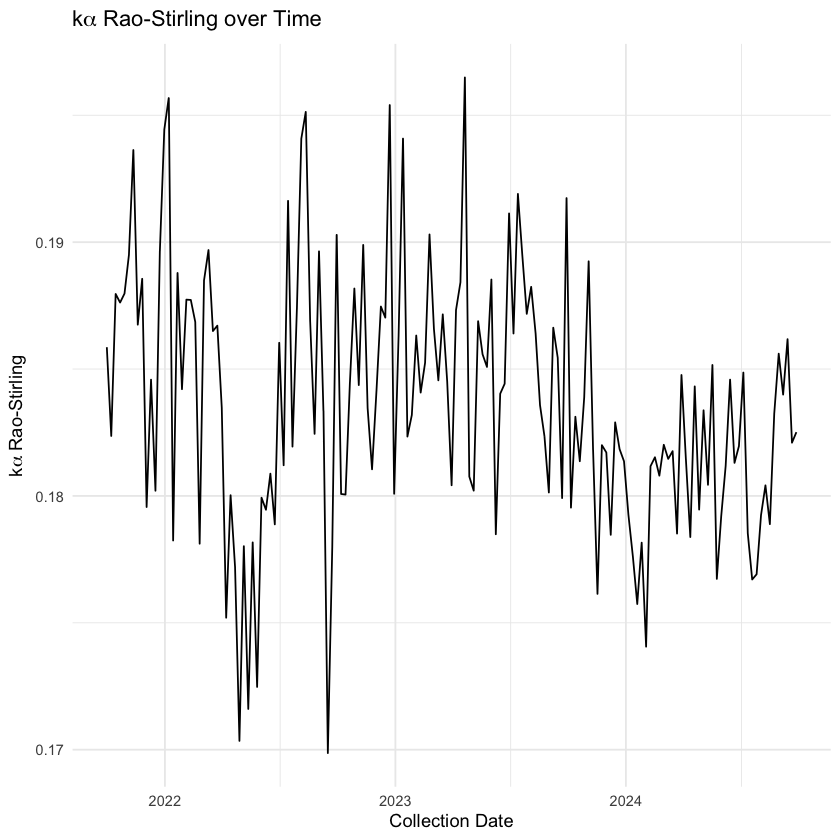

In [12]:
# Basic time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_stirling = mean(diversity_clean))

ggplot(
        df_mean,
        aes(x = collection_date, y = mean_stirling)
    ) +
    geom_line() +
    #geom_point() +
    labs(
        title = expression(k*alpha*" Rao-Stirling over Time"), #nolint
        x = "Collection Date",
        y = expression(k*alpha*" Rao-Stirling") #nolint
    ) +
  theme_minimal()


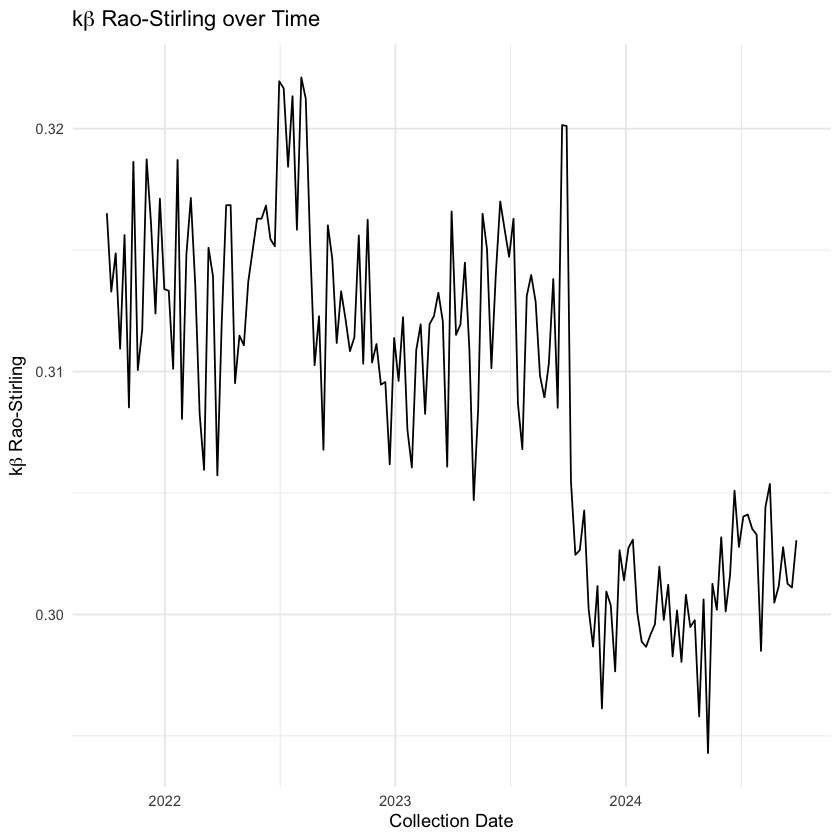

In [13]:
# Basic time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
        df_mean,
        aes(x = collection_date, y = mean_stirling)
    ) +
    geom_line() +
    #geom_point() +
    labs(
        title = expression(k*beta*" Rao-Stirling over Time"), #nolint
        x = "Collection Date",
        y = expression(k*beta*" Rao-Stirling") #nolint
    ) +
  theme_minimal()


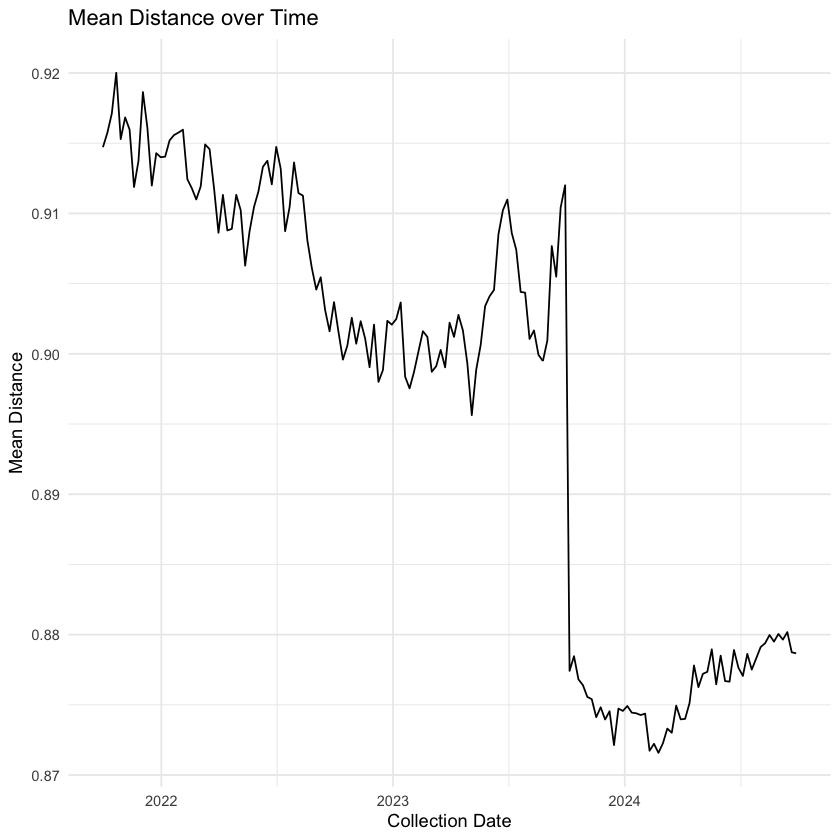

In [14]:
# Basic time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_distances = mean(distances_3))

ggplot(
        df_mean,
        aes(x = collection_date, y = mean_distances)
    ) +
    geom_line() +
    #geom_point() +
    labs(
        title = "Mean Distance over Time",
        x = "Collection Date",
        y = "Mean Distance"
    ) +
  theme_minimal()


In [ ]:
# Extract unique diversity values per playlist
playlist_diversity <- df %>%
  distinct(playlist_name, diversity_clean)

# Plot the histogram using one observation per playlist
ggplot(
  playlist_diversity,
  aes(x = diversity_clean)
  ) +
  geom_histogram(
    binwidth = 0.025,
    color = "black",
    fill = "#a7a7f9"
    ) +
  xlim(0, 0.5) +
  theme_bw() +
  theme(
    panel.grid.major.y = element_line(linetype = "dotted"),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    aspect.ratio = 0.8
  ) +
  labs(
    x = expression(k*alpha*" Rao-Stirling"), #nolint
    y = "Frequency"
  )


In [ ]:
# Extract unique diversity values per playlist
playlist_diversity <- df %>%
  distinct(playlist_name, diversity_clean_2)

# Plot the histogram using one observation per playlist
ggplot(
  playlist_diversity,
  aes(x = diversity_clean_2)
  ) +
  geom_histogram(
    binwidth = 0.025,
    color = "black",
    fill = "#a7a7f9"
    ) +
  xlim(0, 0.75) +
  theme_bw() +
  theme(
    panel.grid.major.y = element_line(linetype = "dotted"),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    aspect.ratio = 0.8
  ) +
  labs(
    x = expression(k*beta*" Rao-Stirling"), #nolint
    y = "Frequency"
  )


## Models

### OLS models

In [20]:
# Optionally create a numeric 'time' variable (e.g., 'week_number') as above
library(plm)
df <- df %>%
  mutate(
    week_number = as.numeric(
        difftime(collection_date,
        min(collection_date),
        units = "weeks")
    )
  )
summary(df$week_number)

model_fe <- plm(
    diversity_norm_2 ~ week_number + week_number:curator + nb_tracks,
    data = df,
    index = c("playlist_name", "collection_date"),
    model = "within",
    effect = "individual"
)
summary(model_fe)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   52.00  104.00   91.06  130.00  156.00 

Oneway (individual) effect Within Model

Call:
plm(formula = diversity_norm_2 ~ week_number + week_number:curator + 
    nb_tracks, data = df, effect = "individual", model = "within", 
    index = c("playlist_name", "collection_date"))

Unbalanced Panel: n = 122, T = 52-157, N = 12748

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-7.81800 -0.30194  0.08567  0.41797  4.09432 

Coefficients:
                                  Estimate  Std. Error  t-value
week_number                     0.00024821  0.00015220   1.6308
nb_tracks                      -0.01581316  0.00075419 -20.9672
week_number:curatorMajor label  0.00132440  0.00080794   1.6392
                                          Pr(>|t|)    
week_number                                 0.1030    
nb_tracks                      <0.0000000000000002 ***
week_number:curatorMajor label              0.1012    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    5806.2
Residual Sum of Squ

In [ ]:
# Collapse data to playlist level
playlist_level_data <- df %>%
  group_by(playlist_name) %>%
  summarize(
    # Averaging track-level variables
    avg_track_popularity = mean(track__popularity, na.rm = TRUE),
    avg_artist_popularity = mean(artist_popularity, na.rm = TRUE),

    # Retaining playlist-level variables
    diversity_norm = unique(diversity_norm),
    diversity_norm_2 = unique(diversity_norm_2),
    dist_norm_3 = unique(dist_norm_3),
    log_followers = unique(log_followers),
    type = unique(type),
    curator = unique(playlist_curator),
    playlist_date = unique(playlist_date),
    nb_tracks = n(),
    .groups = "drop"
  )


In [ ]:
# Robust OLS model diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + type,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")


In [ ]:
# Robust OLS model diversity 2
model <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + type,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")


In [ ]:
# Robust OLS model distance
model <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + type,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")


### Secondary models

#### Playlist curator

In [ ]:
# Collapse data to playlist level
playlist_level_data <- df %>%
  group_by(playlist_name) %>%
  summarize(
    # Averaging track-level variables
    avg_track_popularity = mean(track__popularity, na.rm = TRUE),
    avg_artist_popularity = mean(artist_popularity, na.rm = TRUE),

    # Retaining playlist-level variables
    diversity_norm = unique(diversity_norm),
    diversity_norm_2 = unique(diversity_norm_2),
    dist_norm_3 = unique(dist_norm_3),
    log_followers = unique(log_followers),
    type = unique(type),
    curator = unique(playlist_curator),
    playlist_date = unique(playlist_date),
    nb_tracks = n(),
    .groups = "drop"
  )


In [ ]:
# Playlist curator alone
df_subset <- playlist_level_data %>%
  filter(curator != "charts")

df_subset$curator <- relevel(as.factor(df_subset$curator), ref = "spotify")

model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist curator and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_2_robust <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_2_robust, type = "text")

# OLS model playlist curator and distance
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_3_robust <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_3_robust, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_2_robust, model_3_robust)


In [ ]:
# Playlist curator vs charts
# OLS model playlist curator and diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist curator and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_2_robust <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_2_robust, type = "text")

# OLS model playlist curator and distance
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_3_robust <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_3_robust, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_2_robust, model_3_robust)


#### Playlist dates

In [ ]:
# Playlist dates
# OLS model playlist dates and diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist dates and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust_2 <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_robust_2, type = "text")

# OLS model playlist dates and distances
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust_3 <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_robust_3, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_robust_2, model_robust_3)
